# Statistical Analysis

**Yiwen Wang 20752531**

In [ ]:
import networkx as nx
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt 
import networkx.algorithms.community as nxcom
import scipy
import powerlaw
from NEMtropy import UndirectedGraph, DirectedGraph
from NEMtropy.network_functions import build_adjacency_from_edgelist
from NEMtropy import matrix_generator
import os
import re
from os import path

# The things need to do:



from hw 5:

Average degree of each nodes, plot the degree distribution,
Average clustering coefficient,
Assortativity,

frrom hw 3:

degree centrality,
closness centrality,
betweeness centrality,
eigenvector

Plotting by the total network, split into support, negative, neutral
Splited by years.
Other experiments have shown that sliding by combining 2 years will not change the tedency of coefficient of the network, so it will not show in the repot. But it did change the single node's statistical chatracters. 



**degree 𝑘𝑖 :**
+ Pro: a measure of popularity in a social network
+ Pro: simple and often correlated with more complex metrics
+ Con: does not tell anything about “where” is the node
+ Con: does not discriminate “quality” of connections

It is a local property. It depends on node and its neighbours

How much contact of each one voter to others. The higher degree of one voter, the more active it takes part in the elcetion or being elected as a editor.

**closeness 𝑐𝑖 :**
+ Pro: identifies top sources of spreading 
+ Pro: “topologically” meaningful concept of centrality
+ Con: sources are central, not bottlenecks

It is a global property. It depends on the whole network

How short are the distances from it to all others. How much work if a participant can reach all participants.


**betweenness 𝑏𝑖 :**
+ Pro: identifies high-throughput nodes 
+ Pro: “topologically” meaningful centrality
+ Con: does not identify sources, only bottlenecks

It is a global property. It depends on the whole network

How important of one voter can make a link to other voters. In other words, measure the importance of a voter can make collabrations.

**eigenvector 𝑒𝑖 :**

How important a voter is connected to many voters who themselves important. 


**Average clustering coefficient:**

The clustering coefficient is a node property. It measures how likely is that if two nodes are neighbours of a focal one,
there is an edge between them. 
In most real world networks the clustering coeffcient is large.


**Assortativity:**

measures if a node with many low-degree nodes connected to other low-degree nodes or high-degree nodes connected to low-degree nodes. 
+ Technological networks → dissortative
+ Social networks → assortative

# Load network

In [2]:
G=nx.read_gml("wiki_RfA.gml")

In [3]:
# load the network
url="year/year"
file = os.listdir(url)
Net=[]
for f in file:
    g=nx.read_gml(f"year/year/{f}")
    Net.append(g)

In [4]:
#THE LAST ONE IS THE WHOLE TIME PERIOD
Net.append(G)

# Prepare Functions

In [59]:
# calculate 4 centrality measures
#degree centrality
#closness centrality
#betweeness centrality
#eigenvector
def calcenmeasures(network):     
    degree_cen = nx.degree_centrality(network)   
    between_cen = nx.betweenness_centrality(network)    
    close_cen = nx.closeness_centrality(network)
    try:
        eigen_cen = nx.eigenvector_centrality(network)
    except:
        eigen_cen = {}
        print('not enough data')
    
    return degree_cen, between_cen, close_cen, eigen_cen

In [6]:
# define the function computing coefficients
# avergage clustering
# assortativity
def calcoe(network):
    avclustering=nx.average_clustering(network)
    assortativity=nx.degree_assortativity_coefficient(network)
    
    return avclustering,assortativity

In [7]:
# swtich dic to array
def switchtoarray(dic):
    arr=[]
    for d in dic:
        arr.append(np.asarray([i for i in d.values()])) 
        
    return arr  

In [35]:
# the plot of 4 centrality measures
def plotCoefficient(all_data,time,label,n1,n2):
    Label=[]
    for i in time:
        number = re.findall("\d+",i) 
        Label.append(number[0])
    Label.append('Total')
    
    fig, ax = plt.subplots(nrows=n1, ncols=n2, figsize=(12, 12))
    
    for i in range(n1):
        for j in range(n2):
            n=i*n2+j
            ax[i][j].boxplot(all_data[n])
            ax[i][j].set_xlabel('Time')
            ax[i][j].set_ylabel(label[n])
            ax[i][j].set_xticklabels(Label)
            
    plt.show()

In [9]:
# can output the top result
def gethigh(DIC):
    selectlist=sorted((DIC), key=DIC.get, reverse=True)[:5]
    top=[]
    for i in selectlist:
        top.append(DIC[i])
    print(selectlist)
    print(top)

In [ ]:
#plot of 
def plotavecoe(Avclustering,Assortativity,time):
    Label=[]
    for i in time:
        number = re.findall("\d+",i) 
        Label.append(number[0])
    Label.append('Total')
    
    fig, ax = plt.subplots()
    ax.plot(Avclustering,label='Avergage clustering')
    ax.plot(Assortativity,label='Assortativity')
    ax.legend()
    ax.set_xticks(range(len(file)+1))
    ax.set_xticklabels(Label)
    ax.set_xlabel('Time') 
    ax.set_title('Avergage clustering & Assortativity by time')
    
    plt.show()   

In [ ]:
def AvdegreeNN(network,time,n1,n2):
    Label=[]
    for i in time:
        number = re.findall("\d+",i) 
        Label.append(number[0])
    Label.append('Total')
    
    fig, ax = plt.subplots(nrows=n1, ncols=n2, figsize=(18,15))
    for i in range(n1):
        for j in range(n2):
            n=i*n2+j
            KNN=nx.average_degree_connectivity(network[n])
            X = [i for i in KNN.keys() ]
            Y = [i for i in KNN.values() ]
            ax[i][j].scatter(X,Y)
            ax[i][j].set_xlabel('degree k')
            ax[i][j].set_ylabel('degree knn')
            ax[i][j].set_title(Label[n])
       
    plt.show()

**1. calculate the centrality measures**

In [10]:
Degree_cen=[]
Between_cen=[]
Close_cen=[]
Eigen_cen=[]
Avclustering=[]
Assortativity=[]

for i in range(len(Net)):
    degree_cen, between_cen, close_cen, eigen_cen=calcenmeasures(Net[i])
    avclustering,assortativity=calcoe(Net[i])
    Degree_cen.append(degree_cen)
    Between_cen.append(between_cen)
    Close_cen.append( close_cen)
    Eigen_cen.append(eigen_cen)
    Avclustering.append(avclustering)
    Assortativity.append(assortativity)


In [11]:
Degree_cen_arr=switchtoarray(Degree_cen)
Between_cen_arr=switchtoarray(Between_cen)
Close_cen_arr=switchtoarray(Close_cen)
Eigen_cen_arr=switchtoarray(Eigen_cen)

In [12]:
all_data=[Degree_cen_arr,Between_cen_arr,Close_cen_arr,Eigen_cen_arr]

**2.plotting**

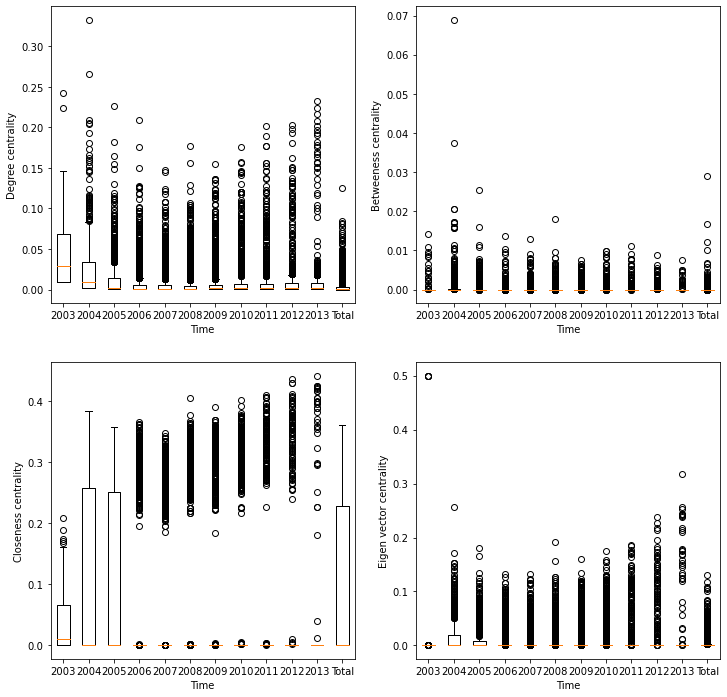

In [36]:
plotCoefficient(all_data,file ,['Degree centrality','Betweeness centrality','Closeness centrality','Eigen vector centrality'],2,2)

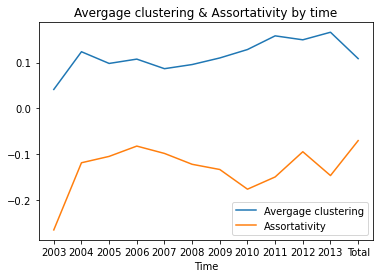

In [33]:
plotavecoe(Avclustering,Assortativity,file)

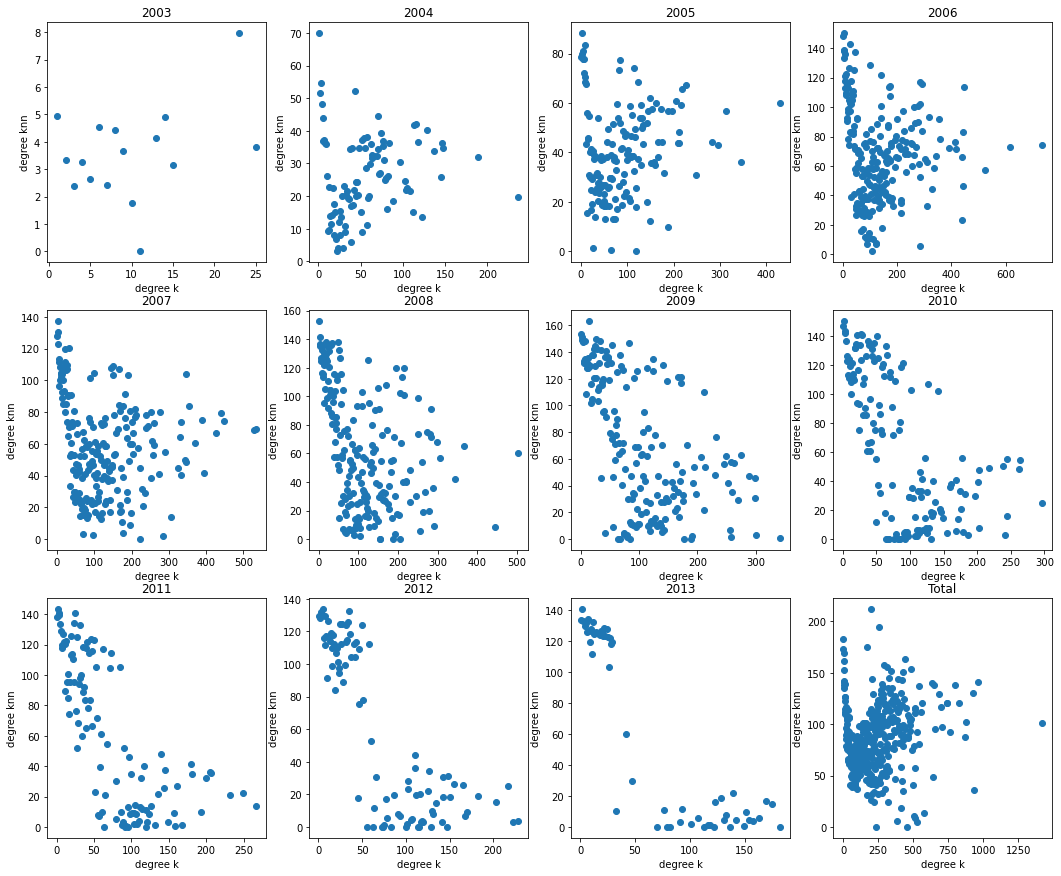

In [53]:
AvdegreeNN(Net,file,3,4)  

# If we split the network by edges attribute

In [54]:
def makenewgrap(network):
    H1 = nx.DiGraph(((u, v, e) for u,v,e in network.edges(data=True) if e['weight'] == 1))
    H0 = nx.DiGraph(((u, v, e) for u,v,e in network.edges(data=True) if e['weight'] == 0))
    H_ = nx.DiGraph(((u, v, e) for u,v,e in network.edges(data=True) if e['weight'] == -1))
    
    return H1,H0,H_ 

In [55]:
#make new 3 graph
SUPPORT=[]
NEUTRAL=[]
REJECT=[]
for i in range(len(Net)):
    N1,N2,N3=makenewgrap(Net[i])
    SUPPORT.append(N1)
    NEUTRAL.append(N2)
    REJECT.append(N3)

In [56]:
def Analysis(Net,file):
    
    Degree_cen=[]
    Between_cen=[]
    Close_cen=[]
    Eigen_cen=[]
    Avclustering=[]
    Assortativity=[]

    for i in range(len(Net)):
        degree_cen, between_cen, close_cen, eigen_cen=calcenmeasures(Net[i])
        avclustering,assortativity=calcoe(Net[i])
        Degree_cen.append(degree_cen)
        Between_cen.append(between_cen)
        Close_cen.append( close_cen)
        Eigen_cen.append(eigen_cen)
        Avclustering.append(avclustering)
        Assortativity.append(assortativity)

    Degree_cen_arr=switchtoarray(Degree_cen)
    Between_cen_arr=switchtoarray(Between_cen)
    Close_cen_arr=switchtoarray(Close_cen)
    Eigen_cen_arr=switchtoarray(Eigen_cen)
    
    all_data=[Degree_cen_arr,Between_cen_arr,Close_cen_arr,Eigen_cen_arr]
    
    plotCoefficient(all_data,file ,['Degree centrality','Betweeness centrality','Closeness centrality','Eigen vector centrality'],2,2)
    
    plotavecoe(Avclustering,Assortativity,file)
    
    AvdegreeNN(Net,file,3,4)  
    

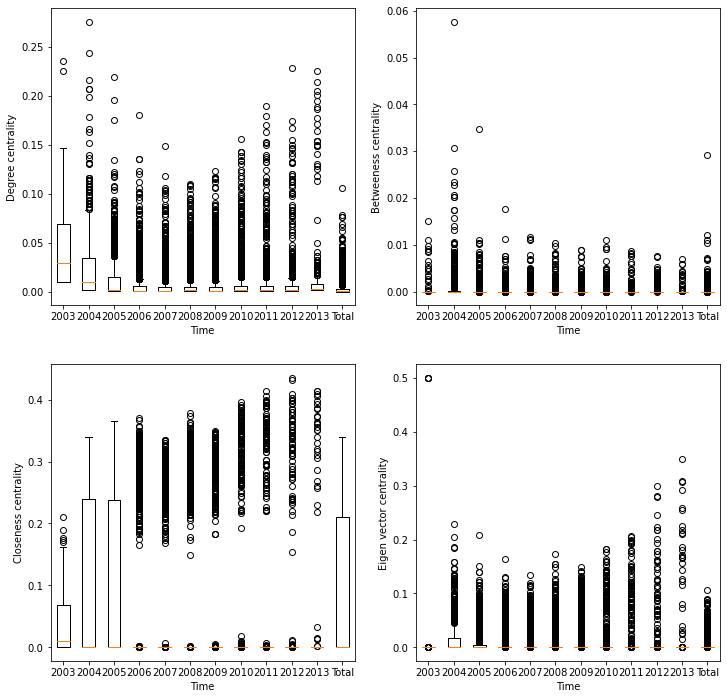

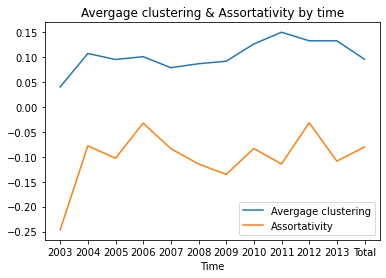

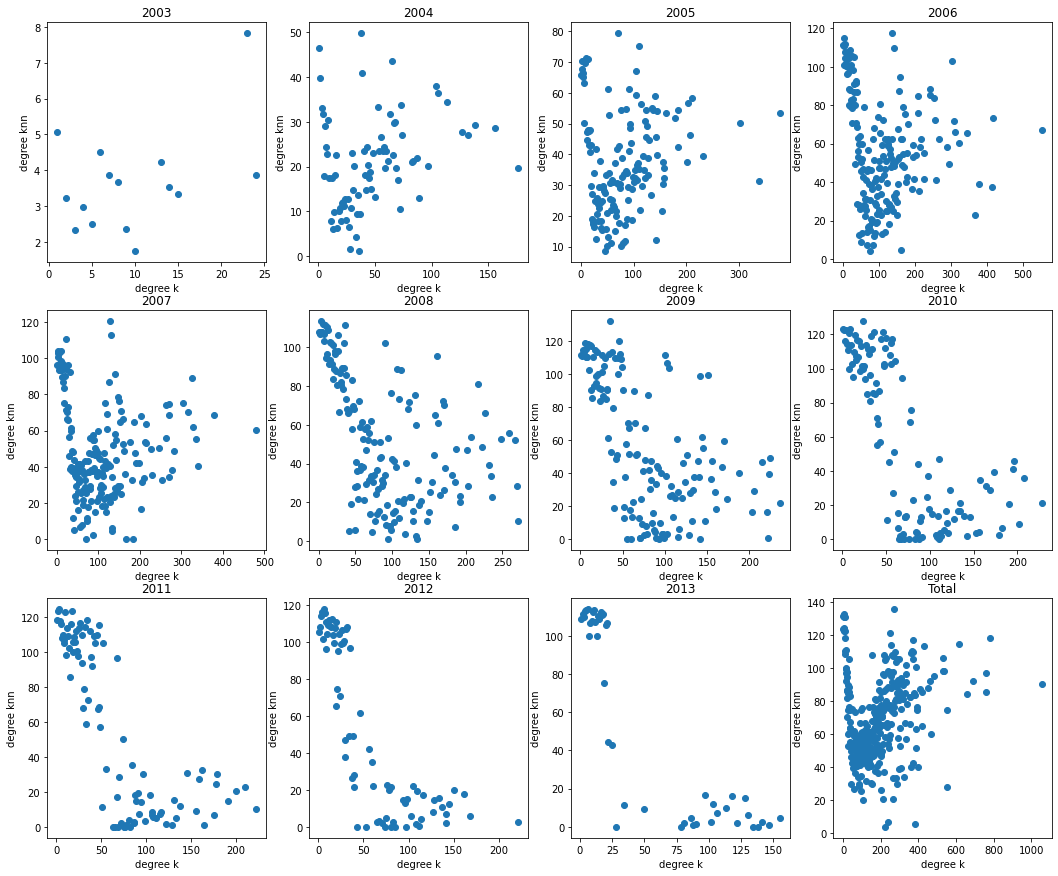

In [57]:
#support
Analysis(SUPPORT,file)

not enough data


C:\Users\wyw25\anaconda3\lib\site-packages\networkx\algorithms\assortativity\correlation.py:282: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


not enough data
not enough data


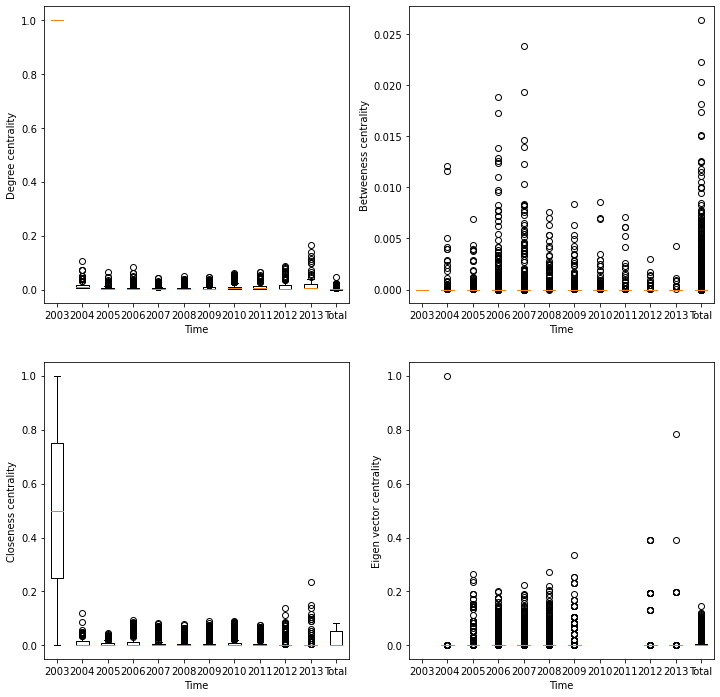

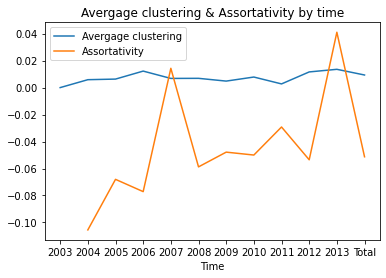

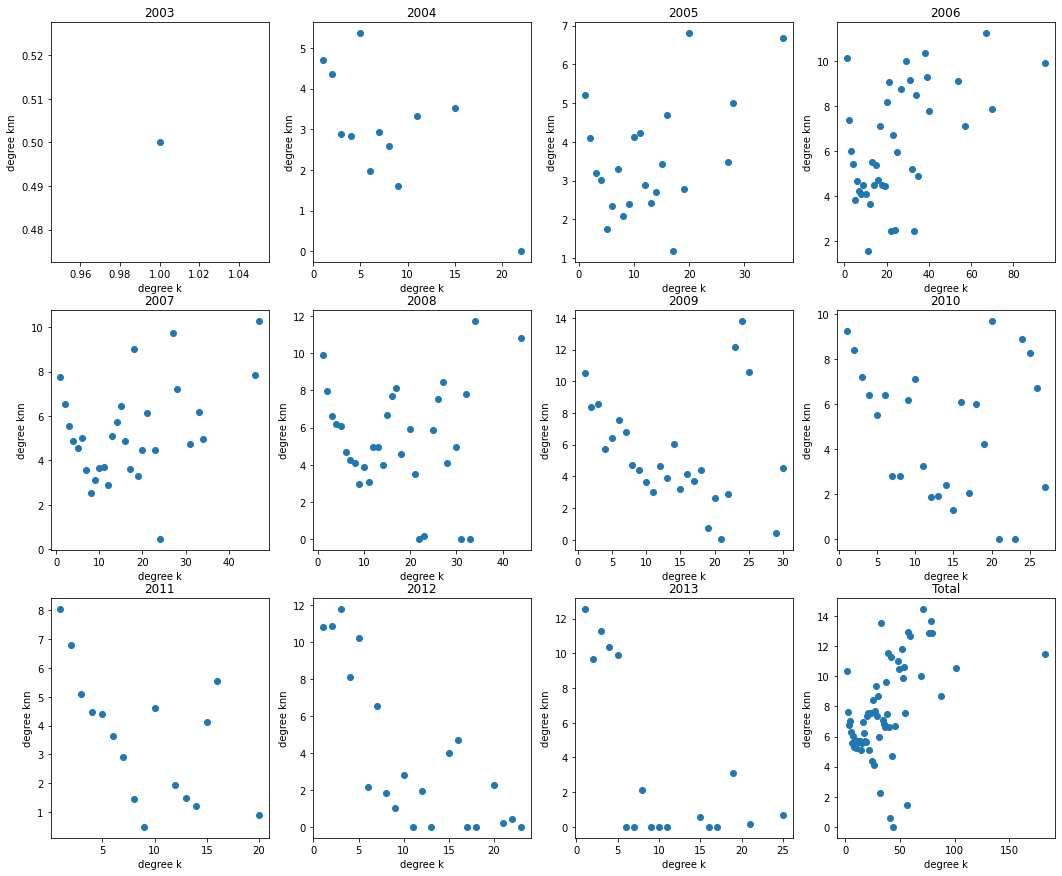

In [60]:
#Neutral
Analysis(NEUTRAL,file)

not enough data


C:\Users\wyw25\anaconda3\lib\site-packages\networkx\algorithms\assortativity\correlation.py:282: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


not enough data


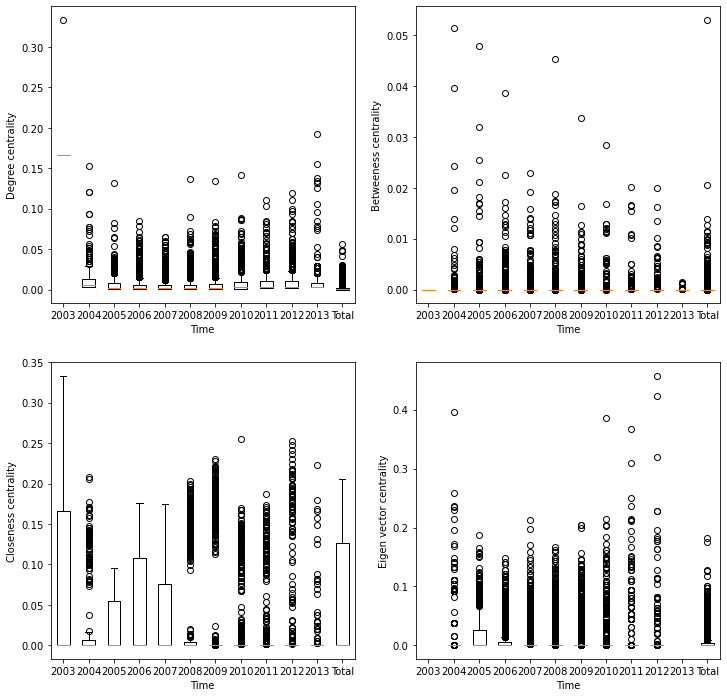

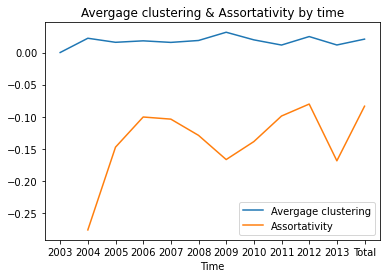

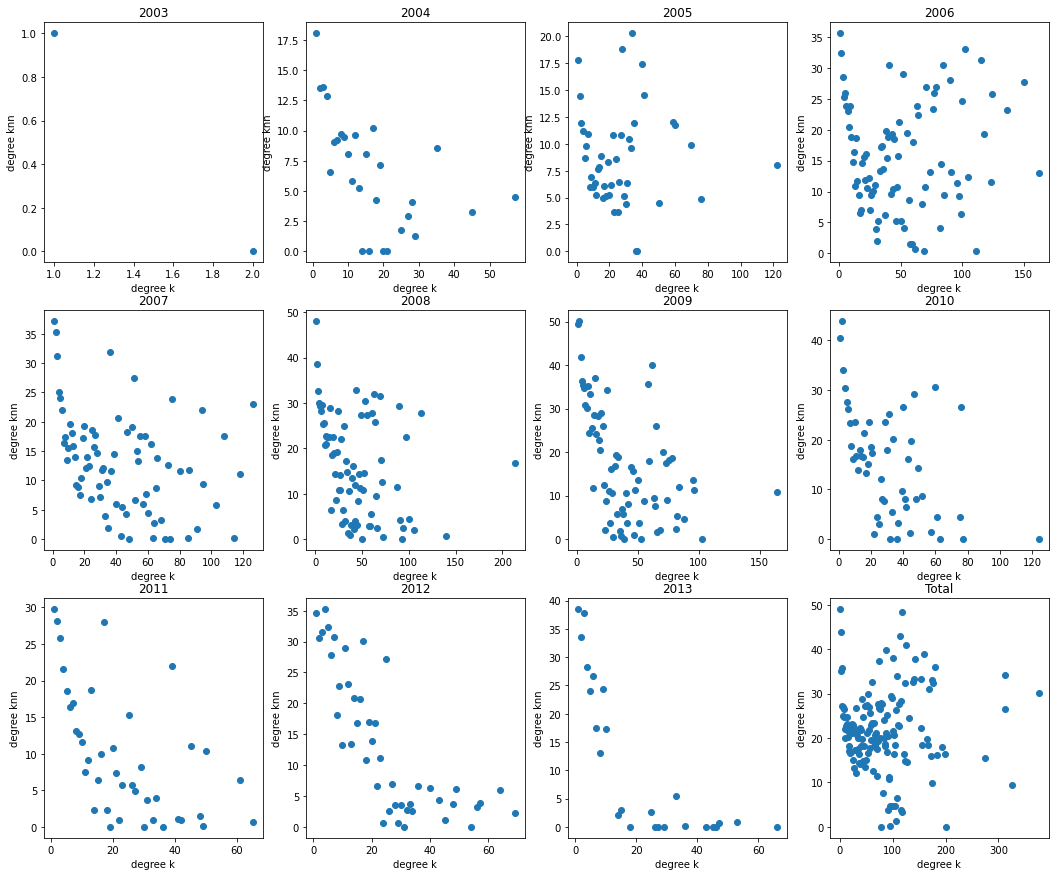

In [61]:
# reject
Analysis(REJECT,file)